<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_51_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 로드

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.
/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/hwa-kim/opt/anaconda3/lib/pytho

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## MNIST 이미지 확인 및 데이터 전처리

<function matplotlib.pyplot.show(*args, **kw)>

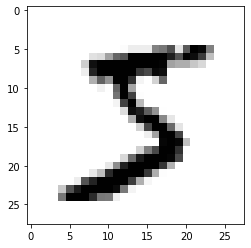

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images_flat = train_images.reshape(60000, 28*28)
train_images_flat = train_images_flat.astype('float32')/255

test_images_flat = test_images.reshape(10000, 28*28)
test_images_flat = test_images_flat.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
train_labels[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## MLP 로 구현(케라스 사용)

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28*28,)))
model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [1]:
model.fit(train_images_flat, train_labels, epochs=5, batch_size=64)

NameError: name 'model' is not defined

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

10000/10000 [==============================] - 1s 113us/step
test_acc =  0.9312


## CNN 모델 생성

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5770      
Total para

## 훈련

In [0]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
60000/60000 [==============================] - 7s 118us/step - loss: 0.1769 - acc: 0.9447
Epoch 2/3
60000/60000 [==============================] - 3s 57us/step - loss: 0.0498 - acc: 0.9849
Epoch 3/3
60000/60000 [==============================] - 3s 58us/step - loss: 0.0356 - acc: 0.9891


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

10000/10000 [==============================] - 1s 59us/step
test_acc =  0.9903
